In [38]:
import heapq

import mglearn as mglearn
import np as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
import heapq

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics


You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


class example

In [8]:
X_train = pd.read_csv("./IMDB dataset/X_train.csv").values
y_train = pd.read_csv("./IMDB dataset/y_train.csv").values.ravel()
X_test = pd.read_csv("./IMDB dataset/X_test.csv").values
y_test = pd.read_csv("./IMDB dataset/y_test.csv").values.ravel()

# Random Forest

In [14]:
random_forest = RandomForestClassifier(n_estimators=60)
% time random_forest.fit(X_train, y_train)
print("Accuracy on training: {:3f}".format(random_forest.score(X_train, y_train)))
print("Accuracy on test: {:3f}".format(random_forest.score(X_test, y_test)))
print('Features: ', random_forest.n_features_)

CPU times: user 7.98 s, sys: 63.5 ms, total: 8.04 s
Wall time: 8.08 s
Accuracy on training: 1.000000
Accuracy on test: 0.818193
Features:  1000


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
import sklearn_evaluation


def grid_search_random_forest(max_features, max_depth):
    parameters = {
        'max_features': max_features,
        'max_depth': max_depth,
    }
    classifier = RandomForestClassifier(
        n_estimators=40,
        random_state=2
    )

    grid_search = GridSearchCV(
        classifier,
        parameters,
        cv=4,
        return_train_score=True,
    )
    grid_search.fit(X_train, y_train)

    print_grid_search_results(grid_search, parameters)

    return grid_search


def print_grid_search_results(grid_search, parameters):
    for parameter in parameters:
        print(f'Best {parameter}:', grid_search.best_params_[parameter])
    predictions = grid_search.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, predictions))


def graph_grid_search_random_forest(grid_search):
    plt.title("Random Forest")
    plt.xlabel("max_features")
    plt.ylabel("max_depth")

    sklearn_evaluation.evaluator.plot.grid_search(
        grid_search.cv_results_,
        change=( "max_depth", "max_features")
    )

    # for index, value in enumerate(alphas):
    #     plt.plot(alphas[index], scores[index])
    plt.legend()
    # fig = plt.figure()
    plt.show()

trial 1

In [16]:
max_depth = np.linspace(1, 10, 5, dtype=int)
max_features = np.linspace(1, 35, 5, dtype=int)

grid_search_t1 = %time grid_search_random_forest( max_depth, max_features )

Best max_depth: 18
Best max_features: 10
Accuracy:  0.8067522700908036
CPU times: user 1min 45s, sys: 5.94 s, total: 1min 51s
Wall time: 1min 52s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


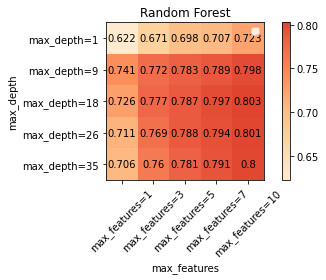

In [21]:
graph_grid_search_random_forest(grid_search_t1)

trial 2

In [24]:
max_features = np.linspace(8, 18, 5, dtype=int)
max_depth = np.linspace(25, 50, 5, dtype=int)

grid_search_t2 = %time grid_search_random_forest( max_features, max_depth )

Best max_features: 18
Best max_depth: 25
Accuracy:  0.8105524220968838
CPU times: user 3min 57s, sys: 9.44 s, total: 4min 6s
Wall time: 4min 8s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


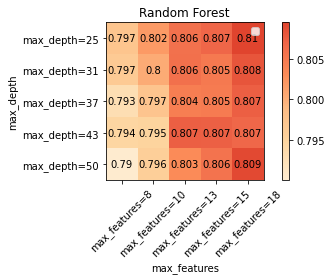

train:  0.9915585929774032


In [28]:
graph_grid_search_random_forest(grid_search_t2)
print('train: ', np.mean(grid_search_t2.cv_results_['mean_train_score']))

trial 3

In [29]:
rf_t3 = RandomForestClassifier(random_state=2)
n_estimators_t3 = np.linspace(40, 140, 5, dtype=int)
hyperparams = {'n_estimators': n_estimators_t3}
grid_search_t3 = GridSearchCV(
    rf_t3,
    hyperparams,
    cv=4,
    return_train_score=True,
)
%time grid_search_t3.fit(X_train, y_train)

CPU times: user 3min 25s, sys: 4.67 s, total: 3min 30s
Wall time: 3min 31s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=2),
             param_grid={'n_estimators': array([ 40,  65,  90, 115, 140])},
             return_train_score=True)

In [32]:
print_grid_search_results(grid_search_t3, hyperparams)
print('train: ', np.mean(grid_search_t2.cv_results_['mean_train_score']))

Best n_estimators: 140
Accuracy:  0.8299931997279891
train:  0.9915585929774032


[ 40  65  90 115 140]
      Train      Test
0  0.999960  0.808352
1  1.000000  0.819073
2  0.999987  0.822833
3  1.000000  0.824833
4  1.000000  0.826553


<AxesSubplot:>

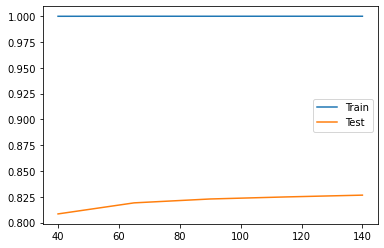

In [33]:
n_estimators = pd.DataFrame(grid_search_t3.cv_results_['params'])
train_scores = pd.DataFrame(grid_search_t3.cv_results_['mean_train_score'], columns=['Train'])
test_scores = pd.DataFrame(grid_search_t3.cv_results_['mean_test_score'],  columns=['Test'])
display_frame = pd.concat([train_scores, test_scores], axis=1)
print(n_estimators.values.flatten())
print(display_frame)
display_frame.index = n_estimators.values.flatten()
display_frame.plot()


## Accuracy Comparison

create optimal rf

In [35]:
optimal_rf = RandomForestClassifier(
    n_estimators=140,
    max_features=18,
    max_depth=25,
    random_state=2
)
optimal_rf.fit(X_train, y_train)
print("Train Score: ", optimal_rf.score(X_train, y_train))
print("Test Score: ", optimal_rf.score(X_test, y_test))


Train Score:  0.9749589983599344
Test Score:  0.8294731789271571


0.8294731789271571


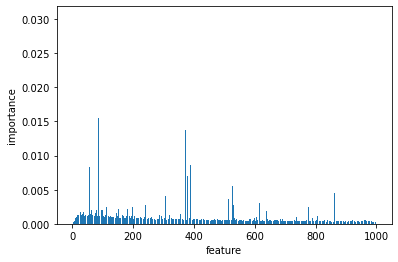

In [40]:
print(optimal_rf.score(X_test, y_test))
feature_importances_rf = optimal_rf.feature_importances_
plt.bar(
    range(0, 1000),
    feature_importances_rf,
)
plt.ylabel('importance')
plt.xlabel('feature')
plt.show()

In [43]:
top_10_rf_importances = heapq.nlargest(10, feature_importances_rf)
top_10_rf_importances
top_10_rf_importances_indices = []
for item in top_10_rf_importances:
    correct_actual_item_index = np.argwhere(feature_importances_rf == item)
    top_10_rf_importances_indices.append(correct_actual_item_index[0][0])

top_10_rf_importances_indices

[78, 249, 87, 437, 373, 394, 118, 321, 389, 357]

In [51]:
print('sum of top: ', sum(top_10_rf_importances))

least_rf = heapq.nsmallest(360, feature_importances_rf)
print('sum of bottom: ', sum(least_rf))

sum of top:  0.14499814767543767
sum of bottom:  0.14166437914241056


misclassifieds

In [53]:
y_predictions = optimal_rf.predict(X_test)
print(metrics.accuracy_score(y_predictions, y_test))
misclassified_indices = np.where((y_predictions != y_test))[0]
len(misclassified_indices)

0.8294731789271571


4263

knn for misclassified

In [54]:

k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

print(y_test[misclassified_indices[0]])
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(3):
    columns += ["Neigbor#{}_idx".format(i + 1), "Neigbor#{}_True Class".format(i + 1),
        "Neigbor#{}_Distance".format(i + 1)]

print(columns)
df = pd.DataFrame(columns=columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] = y_test[misclassified_indices]
df["Pred Class"] = y_predictions[misclassified_indices]
for i in range(3):
    df["Neigbor#{}_idx".format(i + 1)] = indices[:, i]
    df["Neigbor#{}_True Class".format(i + 1)] = y_train[indices[:, i]]
    df["Neigbor#{}_Distance".format(i + 1)] = np.around(distances[:, i], decimals=2)

df

1.0
['Misclassified Test idx', 'True Class', 'Pred Class', 'Neigbor#1_idx', 'Neigbor#1_True Class', 'Neigbor#1_Distance', 'Neigbor#2_idx', 'Neigbor#2_True Class', 'Neigbor#2_Distance', 'Neigbor#3_idx', 'Neigbor#3_True Class', 'Neigbor#3_Distance']


,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,1,1.0,0.0,9179,1.0,11.75,12101,1.0,11.79,3978,0.0,11.83
1,2,0.0,1.0,5459,0.0,9.22,2176,1.0,9.27,10811,1.0,9.27
2,7,0.0,1.0,418,1.0,7.28,24990,1.0,7.35,4695,0.0,7.42
3,16,0.0,1.0,922,1.0,8.43,6225,1.0,8.43,23019,0.0,8.43
4,25,0.0,1.0,9989,1.0,9.59,690,1.0,9.75,8003,1.0,9.75
...,...,...,...,...,...,...,...,...,...,...,...,...
4258,24974,1.0,0.0,22526,0.0,7.48,6004,0.0,7.75,9778,0.0,7.87
4259,24977,1.0,0.0,9079,1.0,8.77,9761,0.0,8.77,4834,1.0,8.83
4260,24978,1.0,0.0,1072,1.0,12.53,928,1.0,12.61,5008,1.0,12.61
4261,24979,1.0,0.0,418,1.0,8.00,17909,1.0,8.06,9761,0.0,8.12


In [60]:
item_misclassed = X_test[25]
item_neighbor = X_test[9989]
item_misclassed_top = []
item_neighbor_top = []

top_10_rf_importances_indices.sort()
for i in top_10_rf_importances_indices:
    item_misclassed_top.append(
        item_misclassed[i]
    )


for i in top_10_rf_importances_indices:
    item_neighbor_top.append(
        item_neighbor[i]
    )
print(top_10_rf_importances_indices)
print(item_misclassed_top)
print(item_neighbor_top)

[78, 87, 118, 249, 321, 357, 373, 389, 394, 437]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
